# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

# Reading and Exploration of the Datasets

In [3]:
pops = pd.read_csv("state-population.csv")
abbrevs =pd.read_csv("state-abbrevs.csv")
areas =pd.read_csv("state-areas.csv")

In [4]:
print(pops.head());print(abbrevs.head());print(areas.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707


In [5]:
merged = pd.merge(pops,abbrevs, how="outer",left_on="state/region",right_on="abbreviation")

merged=  merged.drop("abbreviation",1)

merged

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN
2540,USA,under18,2011,73902222.0,NaN
2541,USA,total,2011,311582564.0,NaN
2542,USA,under18,2012,73708179.0,NaN


In [6]:
#check null values
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [7]:
final =pd.merge(merged,areas,on="state",how="left")
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [8]:
#check null values
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state             True
area (sq. mi)     True
dtype: bool

# Data Cleaning

In [9]:
final.dropna(inplace=True)
final.head()


,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [10]:
final.describe()

,year,population,area (sq. mi)
count,2448.000000,2.448000e+03,2448.000000
mean,2001.500000,3.494881e+06,74252.627451
std,6.923601,5.011334e+06,94929.655186
min,1990.000000,1.013090e+05,68.000000
25%,1995.750000,7.282355e+05,35387.000000
50%,2001.500000,1.557804e+06,56276.000000
75%,2007.250000,4.406263e+06,84904.000000
max,2013.000000,3.833252e+07,656425.000000


In [11]:
print(final["ages"].value_counts()) ;print(final["year"].value_counts());print()

under18    1224
total      1224
Name: ages, dtype: int64
2013    102
2011    102
1992    102
1994    102
1996    102
1998    102
2000    102
2002    102
2004    102
2006    102
2008    102
2010    102
2012    102
1991    102
1993    102
1995    102
1997    102
1999    102
2001    102
2003    102
2005    102
2007    102
2009    102
1990    102
Name: year, dtype: int64



# The Total Population each year in the United States

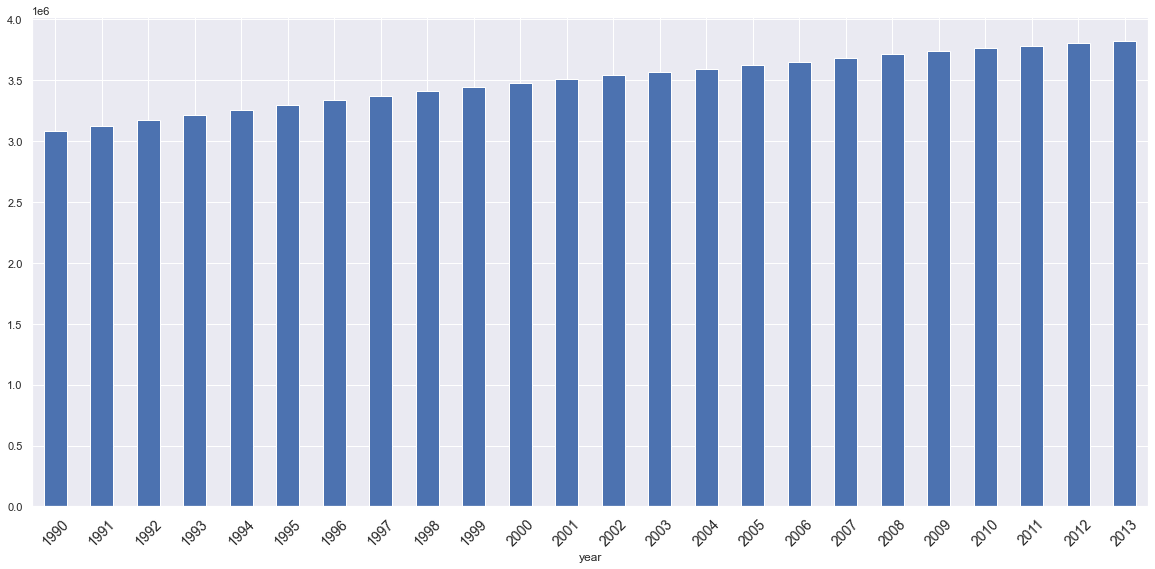

In [12]:
ap=final.groupby("year")["population"].mean()
plt.figure(figsize=(20,9))
ap.plot(kind="bar",rot=45)
ap = plt.xticks(fontsize=14)

<Figure size 1440x648 with 0 Axes>

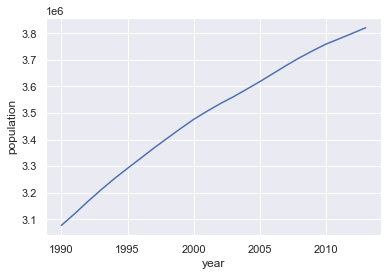

<Figure size 1440x648 with 0 Axes>

In [13]:
cap =final.groupby("year")["population"].mean()
sns.lineplot(data=cap)
plt.figure(figsize=(20,9))


# THE STATES PER AREA(sq.mi)

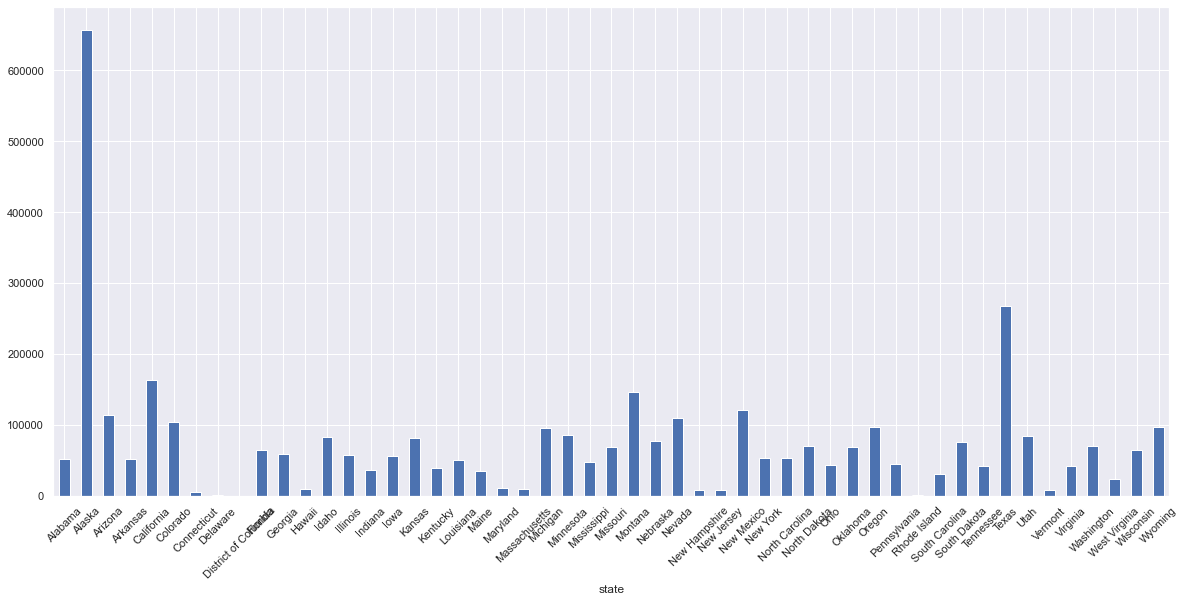

In [14]:
ap=final.groupby("state")["area (sq. mi)"].mean()
plt.figure(figsize=(20,9))
ap.plot(kind="bar",rot=45)


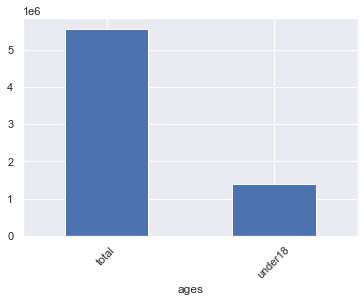

In [15]:
final.groupby("ages")["population"].mean().plot(kind="bar",rot=45)

# THE TOTAL POPULATION OF EACH STATES

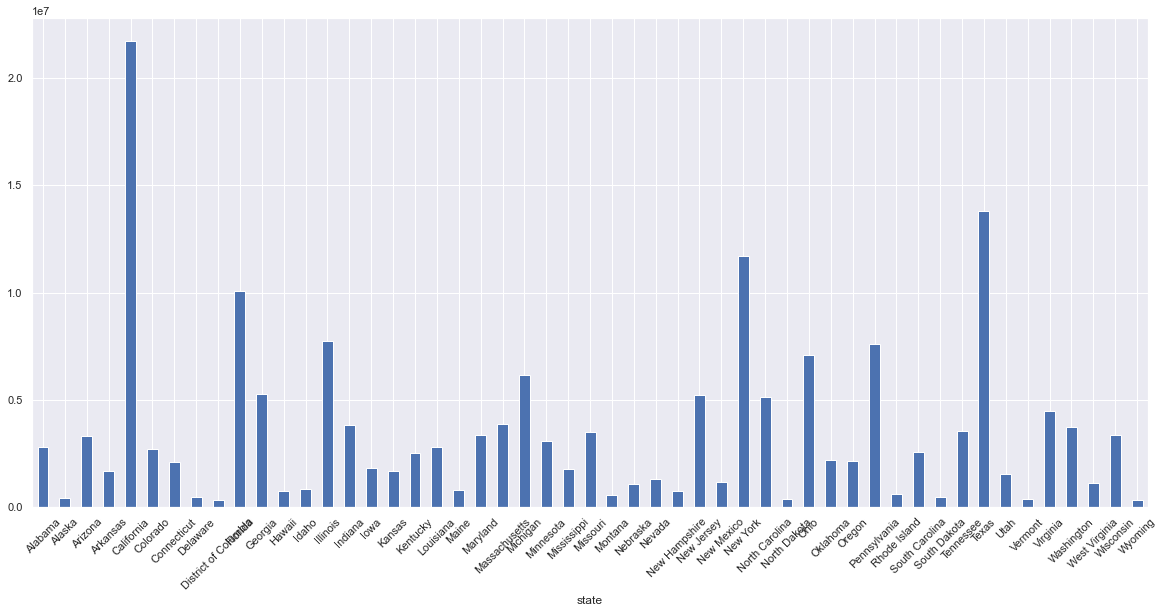

In [16]:
ap=final.groupby("state")["population"].mean()
plt.figure(figsize=(20,9))
ap.plot(kind="bar",rot=45)



In [50]:
int =final["population"].groupby(final["state"]).agg("mean")#value_counts()
int.sort_values(ascending=False, inplace=True)
int

state
California              2.170908e+07
Texas                   1.381758e+07
New York                1.171282e+07
Florida                 1.008313e+07
Illinois                7.757703e+06
Pennsylvania            7.615765e+06
Ohio                    7.079279e+06
Michigan                6.157709e+06
Georgia                 5.285421e+06
New Jersey              5.227053e+06
North Carolina          5.140725e+06
Virginia                4.494164e+06
Massachusetts           3.891187e+06
Indiana                 3.838380e+06
Washington              3.747736e+06
Tennessee               3.579156e+06
Missouri                3.522333e+06
Wisconsin               3.371227e+06
Maryland                3.357502e+06
Arizona                 3.337577e+06
Minnesota               3.108525e+06
Louisiana               2.811572e+06
Alabama                 2.797862e+06
Colorado                2.727803e+06
South Carolina          2.569703e+06
Kentucky                2.536397e+06
Oklahoma                2.192022

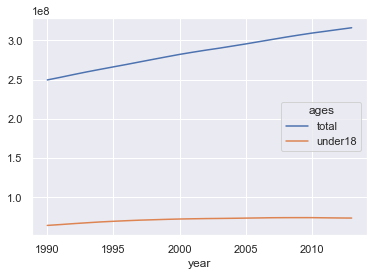

In [59]:
sns.set()
final.pivot_table('population', index='year', columns='ages', aggfunc='sum').plot()

In [93]:
#final.set_index('state', inplace=True)
final["density"]= final["population"]/final['area (sq. mi)']
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    9506.602941
District of Columbia    9315.102941
District of Columbia    9112.117647
District of Columbia    8901.779412
District of Columbia    8898.897059
dtype: float64

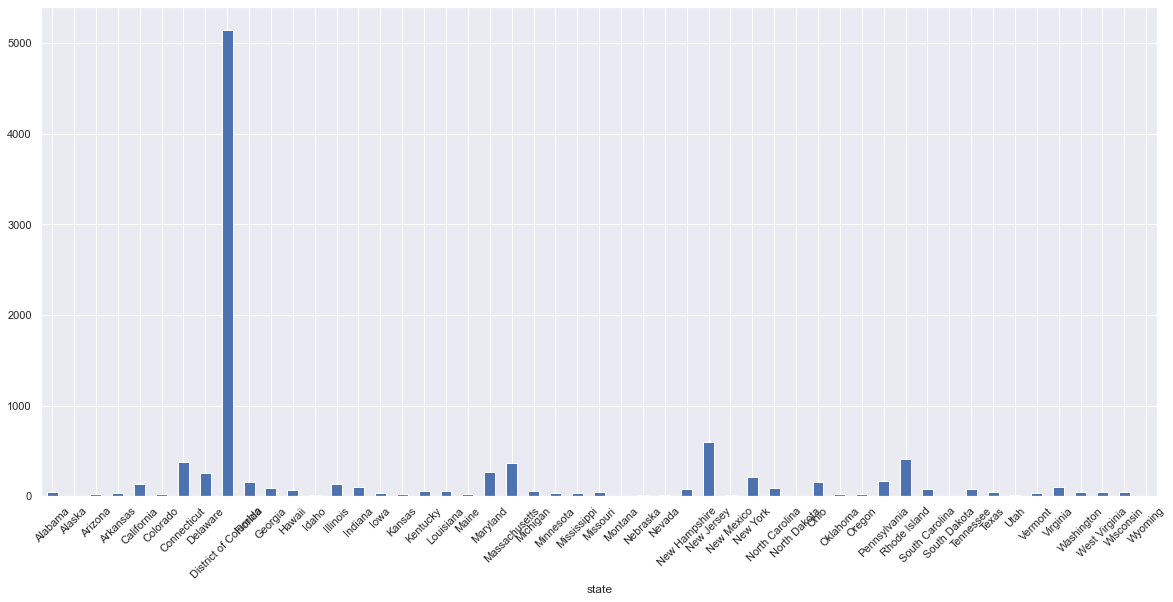

In [94]:
ap=final.groupby("state")["density"].mean()
plt.figure(figsize=(20,9))
ap.plot(kind="bar",rot=45)

In [95]:
final

,state/region,ages,year,population,area (sq. mi),density
state,,,,,,
Alabama,AL,under18,2012,1117489.0,52423.0,21.316769
Alabama,AL,total,2012,4817528.0,52423.0,91.897221
Alabama,AL,under18,2010,1130966.0,52423.0,21.573851
Alabama,AL,total,2010,4785570.0,52423.0,91.287603
Alabama,AL,under18,2011,1125763.0,52423.0,21.474601
...,...,...,...,...,...,...
Wyoming,WY,under18,1993,137458.0,97818.0,1.405242
Wyoming,WY,total,1991,459260.0,97818.0,4.695046
Wyoming,WY,under18,1991,136720.0,97818.0,1.397698


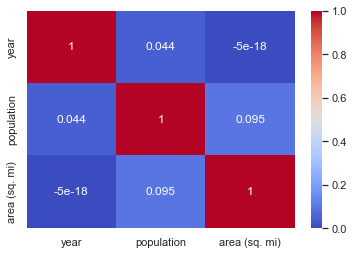

In [35]:
#finding correlations between columns
corrMatrix =final.corr()
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

Findings
- The total population of each states in the united states has had a steady growth from 1990 to 2013
- Alaska is the state with the highest area(sq.mi), followed by texas making it the largest state with land mass
- Majority of the population are above 18,which implies low birthrate
- California is the state with the highest population and wyoming with the lowest
- Delaware has the highest density of the state
- There's no correlation between the columns

insights
-majority of the population are above 18 which shows no or less birth rate over the span of 23years

 






Exploratory Data Analysis on US states datasets gotten from data.gov by Godwin Adegbehingbe 